<a href="https://colab.research.google.com/github/kenrickmendonsa/GitDemoRepo/blob/main/StockMarketPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
sp500 = yf.Ticker("^GSPC")

In [4]:
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000,0.0,0.0
2024-02-06 00:00:00-05:00,4950.160156,4957.770020,4934.879883,4954.229980,4440880000,0.0,0.0
2024-02-07 00:00:00-05:00,4973.049805,4999.890137,4969.049805,4995.060059,4895590000,0.0,0.0


<Axes: xlabel='Date'>

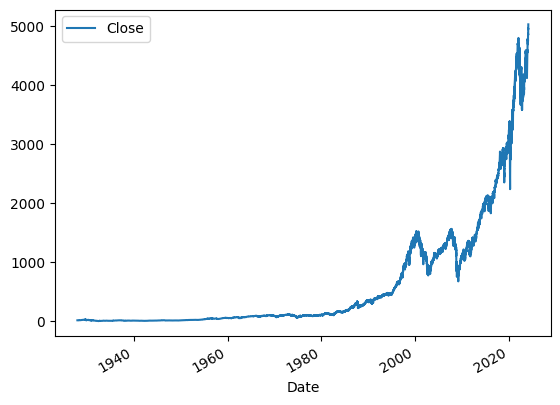

In [5]:
sp500.plot.line(y="Close", use_index=True)

In [6]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [7]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000
2024-02-06 00:00:00-05:00,4950.160156,4957.770020,4934.879883,4954.229980,4440880000
2024-02-07 00:00:00-05:00,4973.049805,4999.890137,4969.049805,4995.060059,4895590000


In [8]:
################### Target #######################
# To predict if price tomorrow is going up or down
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [10]:
# Now create a target and see if tomorrows price is greater than today's price
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000,4954.229980,1
2024-02-06 00:00:00-05:00,4950.160156,4957.770020,4934.879883,4954.229980,4440880000,4995.060059,1
2024-02-07 00:00:00-05:00,4973.049805,4999.890137,4969.049805,4995.060059,4895590000,4997.910156,1


In [12]:
sp500 = sp500.loc["1990-01-01":].copy()

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [16]:
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

In [17]:
predictors = ["Close", "Volume", "Open", "High", "Low"]

In [18]:
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [19]:
from sklearn.metrics import precision_score

In [20]:
preds = model.predict(test[predictors])

In [21]:
import pandas as pd

In [22]:
preds = pd.Series(preds, index=test.index)

In [23]:
preds
# now it's a series so little easier to read and not a NumPy Array

Date
2023-09-19 00:00:00-04:00    1
2023-09-20 00:00:00-04:00    0
2023-09-21 00:00:00-04:00    1
2023-09-22 00:00:00-04:00    1
2023-09-25 00:00:00-04:00    0
                            ..
2024-02-05 00:00:00-05:00    0
2024-02-06 00:00:00-05:00    0
2024-02-07 00:00:00-05:00    0
2024-02-08 00:00:00-05:00    0
2024-02-09 00:00:00-05:00    0
Length: 100, dtype: int64

In [25]:
precision_score(test["Target"], preds)

0.6052631578947368

In [26]:
# so 60% of the time, the model will be right and we'll make a lot of cash